<a href="https://colab.research.google.com/github/LintangAprillya/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPORAN PCVK - MODUL 9 : Morfologi**





---


Nama  : Lintang Aprillya Sari

Kelas : 3C

Absen : 13

NIM   : 2241720231


---



**TUGAS PRAKTIKUM**

#1. Import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2.  Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

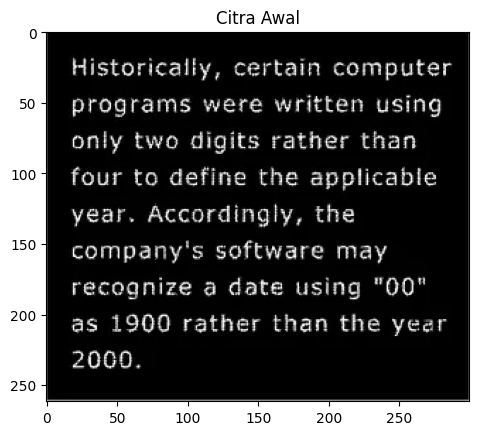

In [8]:
# Load the image
image_path = '/content/drive/MyDrive/Assets/morphology.png'
image = cv2.imread(image_path, 0)  # Load in grayscale
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.show()

In [4]:
def dilate(image, kernel):
    # Get the image dimensions
    img_height, img_width = image.shape
    # Get the kernel dimensions
    k_height, k_width = kernel.shape
    # Define padding for the image based on kernel size
    pad_h = k_height // 2
    pad_w = k_width // 2

    # Create an output image with the same dimensions as the input
    dilated_img = np.zeros((img_height, img_width), dtype=np.uint8)

    # Pad the original image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Perform dilation
    for i in range(pad_h, img_height + pad_h):
        for j in range(pad_w, img_width + pad_w):
            # Extract the neighborhood of the current pixel
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            # Apply the dilation operation (max of the neighborhood with the structuring element)
            dilated_img[i - pad_h, j - pad_w] = np.max(region[kernel == 1])

    return dilated_img


In [5]:
# Define a 3x3 cross-shaped structuring element
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


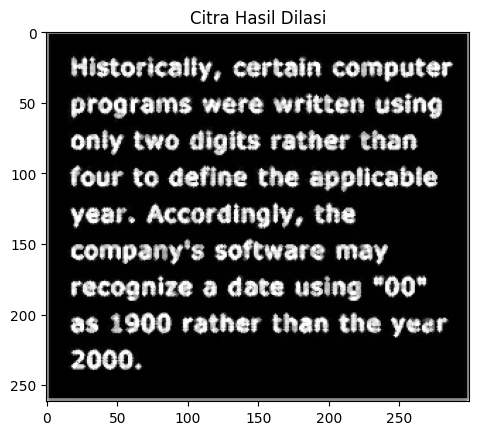

In [7]:
# Apply the dilation function
dilated_image = dilate(image, kernel)

# Display the result
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.show()


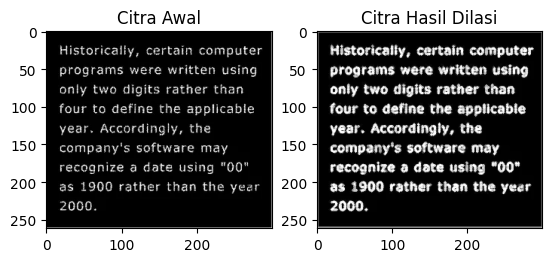

In [11]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis()

# Dilated image
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis()

# Show the plot
plt.show()

# 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

Structuring Element (Cross 3x3):
[[0 1 0]
 [1 1 1]
 [0 1 0]]


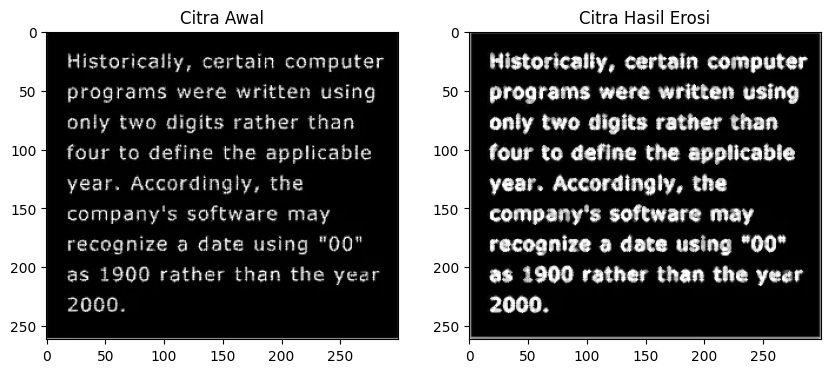

In [13]:
# Define a 3x3 cross-shaped structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Print the Structuring Element
print("Structuring Element (Cross 3x3):")
print(kernel)

# Apply dilation using OpenCV
dilated_image = cv2.dilate(image, kernel)

# Display the original and dilated images side by side
plt.figure(figsize=(10, 5))

# Foto asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis()

# Hasil Erosi
plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis()

# Show the plot
plt.show()

# 5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

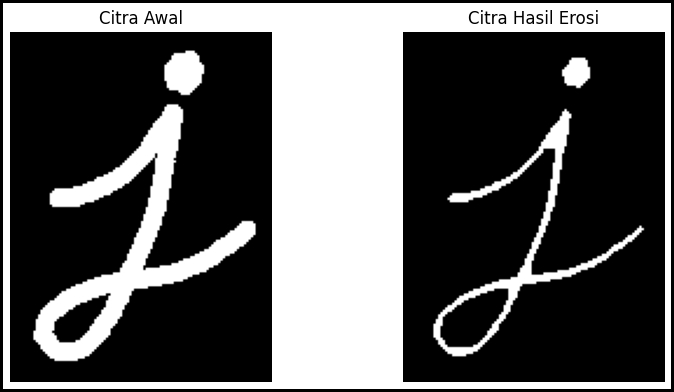

In [30]:
# Load the image
image_path = '/content/drive/MyDrive/Assets/j.png'  # Update this path as needed
image = cv2.imread(image_path, 0)  # Load in grayscale

# Define a 5x5 square-shaped structuring element
kernel = np.ones((5, 5), dtype=np.uint8)

# Define the erosion function
def erode(image, kernel):
    img_height, img_width = image.shape
    k_height, k_width = kernel.shape
    pad_h = k_height // 2
    pad_w = k_width // 2
    eroded_img = np.zeros((img_height, img_width), dtype=np.uint8)
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=255)

    for i in range(pad_h, img_height + pad_h):
        for j in range(pad_w, img_width + pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            eroded_img[i - pad_h, j - pad_w] = np.min(region[kernel == 1])

    return eroded_img

# Apply the erosion function
eroded_image = erode(image, kernel)

# Create a single figure with both images
plt.figure(figsize=(8, 5))  # Increase the width slightly

# Original image with title
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Eroded image with title
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

# Add a black border around the entire plot (both images and titles)
plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.15)  # Adjust right to ensure the border appears
plt.gcf().patch.set_facecolor('white')  # Set the face color to white
plt.gcf().patch.set_edgecolor('black')  # Set the edge color to black
plt.gcf().patch.set_linewidth(3)  # Set the border width

# Show the plot
plt.show()

# 6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

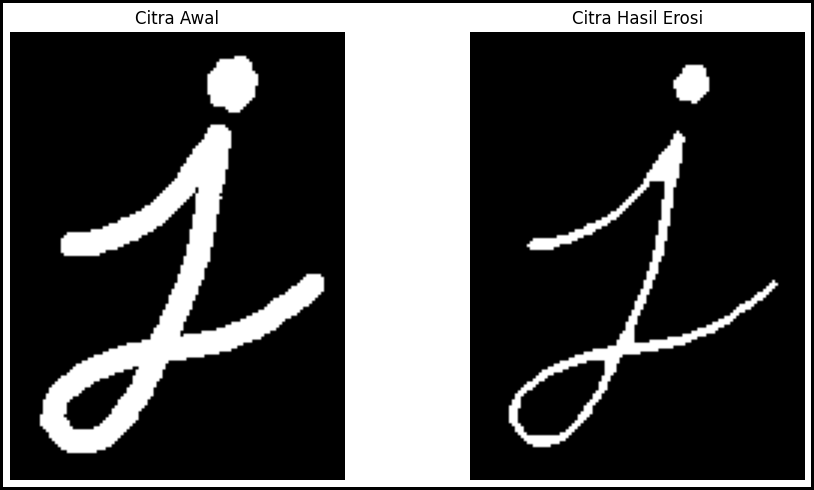

In [33]:
# Load the image
image_path = '/content/drive/MyDrive/Assets/j.png'  # Update this path as needed
image = cv2.imread(image_path, 0)  # Load in grayscale

# Define a 5x5 square-shaped structuring element
kernel = np.ones((5, 5), dtype=np.uint8)

# Apply erosion using OpenCV
eroded_image = cv2.erode(image, kernel, iterations=1)

# Create a figure to display original and eroded images
plt.figure(figsize=(10, 5))

# Original image with title
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

# Eroded image with title
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

# Add a black border around the entire plot (both images and titles)
plt.gcf().patch.set_facecolor('white')  # Set the face color to white
plt.gcf().patch.set_edgecolor('black')  # Set the edge color to black
plt.gcf().patch.set_linewidth(3)  # Set the border width

# Show the plot
plt.tight_layout()
plt.show()

# 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

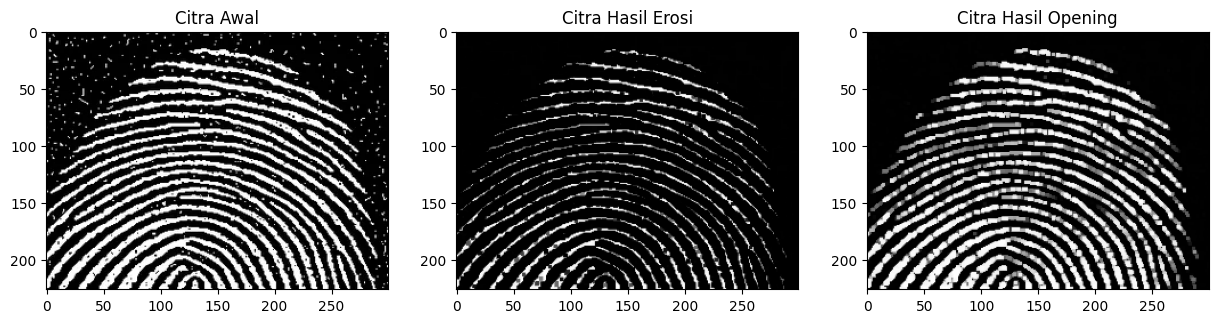

In [40]:
# Load the image
image_path = '/content/drive/MyDrive/Assets/fingerprint.png'  # Update this path as needed
image = cv2.imread(image_path, 0)  # Load in grayscale

# Define a 3x3 square-shaped structuring element
kernel = np.ones((3, 3), dtype=np.uint8)

# Apply erosion using OpenCV
eroded_image = cv2.erode(image, kernel, iterations=1)

# Custom implementation of opening (erosion followed by dilation)
def opening(image, kernel):
    # Erosion
    eroded = cv2.erode(image, kernel, iterations=1)
    # Dilation
    opened = cv2.dilate(eroded, kernel, iterations=1)
    return opened

# Apply custom opening operation
custom_opened_image = opening(image, kernel)

# Create a figure to display original, eroded, and opened images
plt.figure(figsize=(15, 5))

# Original image with title
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis()

# Eroded image with title
plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis()

# Opening image with title
plt.subplot(1, 3, 3)
plt.imshow(custom_opened_image, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis()

# Show the plot
plt.show()